In [15]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import csv
driver = webdriver.Chrome()
url = "https://petitions.assembly.go.kr/closed/established"
driver.get(url)
category_conts = {}


while True:
    time.sleep(1)
    pet_cnt = driver.find_elements(By.XPATH,'//*[@id="contentsbody"]/div/div/div[4]/div[2]/div[2]/ul/li/div')
    
                                                               
    for i in range(1,len(pet_cnt)+1):
        driver.find_element(By.XPATH,'//*[@id="contentsbody"]/div/div/div[4]/div[2]/div[2]/ul/li['+str(i)+']/div/a').click()
        time.sleep(2)
      
        feild = driver.find_element(By.XPATH,'//*[@id="contentsbody"]/div/div/div[3]/div[1]/ul[1]/li/div').text
        period = driver.find_element(By.XPATH,'//*[@id="contentsbody"]/div/div/div[3]/div[1]/ul[2]/li[1]/div').text
        period += '~' + driver.find_element(By.XPATH,'//*[@id="contentsbody"]/div/div/div[3]/div[1]/ul[3]/li[1]/div/span').text
        effect = driver.find_element(By.XPATH,'//*[@id="contentsbody"]/div/div/div[3]/div[2]/dl[2]/dd').text
        contents = driver.find_element(By.XPATH,'//*[@id="contentsbody"]/div/div/div[3]/div[2]/dl[3]/dd').text
#         print("{}\n{}\n{}\n{}".format(feild, period, effect, contents))
        temp = []
        temp.append(period)
        temp.append(effect)
        temp.append(contents)
        if feild not in category_conts:
            category_conts[feild] = []
        category_conts[feild].append(temp)
        driver.back()
    try:
        pages =len(driver.find_elements(By.XPATH, '//*[@id="contentsbody"]/div/div/div[4]/div[3]/ul/li'))
        print(pages)    
        driver.find_element(By.XPATH,'//*[@id="contentsbody"]/div/div/div[4]/div[3]/ul/li['+str(pages-1)+']/a').click()
    except:
        break

11
11
11
12
12
11
11
11


In [16]:
tot = 0
for key, value in category_conts.items():
    tot += len(value)
    print(key, len(value))
print('total ; ', tot)
    

교육 6
수사/법무/사법제도 12
저출산/고령화/아동/청소년/가족 1
외교/통일/국방/안보 2
정치/선거/국회운영 3
농업/임업/수산업/축산업 2
행정/지방자치 4
인권/성평등/노동 7
문화/체육/관광/언론 2
재정/세제/금융/예산 2
산업/통상 4
재난/안전/환경 2
국토/해양/교통 1
소비자/공정거래 1
보건의료 7
과학기술/정보통신 1
total ;  57


In [20]:
print('교육')
print(category_conts['교육'][0][0])
print()
print(category_conts['교육'][0][1])
print()
print(category_conts['교육'][0][2])

교육
2023-09-11~2023-09-09

대한민국의 교육과 관련한 법 어디에도 교권과 관련한 법률적 정의가 없습니다. 하지만 온통 사회가 교권보호를 외치고 있습니다. 교권이 무엇인지 정의조차 되어 있지 않은 상황에서 도대체 무엇을 보호한단 말입니까? 국회는 즉시 교권이 무엇인지 법률로써 우선 규정하고, 이후 관련법과 제도를 모두 개정할 수 있는 근거가 마련되어야 합니다. 대대적인 검토와 대대적인 정비를 하지 않는다면 교육의 미래가 없고, 대한민국의 미래도 없습니다. 

저는 경남 거제의 21년차 초등교사 김지성입니다.   
교권이 무너졌고 보호해야 한다고 누구나 말하고 있는 교권이란 도대체 무엇인가요?

대한민국의 어떤 법에도 교권이 무엇인지 알려주지 않습니다. 
 ‘교권이란 무엇이다’라는 그 ‘한 문장’이 없습니다. 이게 말이 됩니까? 이게 정상입니까? 

저는 교권이란 최소 두가지가 필요하다 생각합니다.
첫째, 교육 전문가로서의 권리입니다. 전문가란 어떤 일에 대하여 잘 알고, 그 일을 스스로 결정하고, 책임을 지는 사람입니다. 그리고 그렇게 할 수 있도록 지원하고 제도를 만들어야 합니다. 초중고 열심히 공부해서 대학에 입학하고, 졸업하고, 임용시험 합격하고 고대하던 학교에 왔습니다. 발령 이후에도 틈틈이 연수, 연구해서 누구보다 교육의 전문가이지만,,,, 교사가 하는 모든 일은 확인, 결재, 잔소리, 참견, 폭언, 심지어 고소나 징계를 걱정하며 결국... 교육을 포기하는... 이게 무슨 교육전문가 입니까? 
심지어 교육하는 것이 교사의 가장 중요한 일인데, 학생이 우선이 아니라 공문 보내고, 단가 조사해 품의하고, 강사 계약서 챙기고, 시설점검하는 것이 과연 교사가 우선 해야하는 일 맞습니까?
 
초중등교육법 제20조 그리고 유아교육법 제21조(교직원의 임무) 
교사는 법령에서 정하는 바에 따라 학생을 교육한다.
행정직원 등 직원은 법령에서 정하는 바에 따라 학교의 행정사무와 그 밖의 사무를 담당한다.

교육당국은 교사가 교육을 제대로 할 수 있도록

In [41]:
from konlpy.tag import Okt
okt = Okt()

contents = category_conts['교육'][0][2]

# print(okt.morphs(contents))   # 형태소 출력
nouns =  okt.nouns(contents)  # 명사 추출
# print(okt.phrases(contents))  # 확장된 형태소
# print(okt.pos(contents))  # 형태소 분석
print(nouns)

['저', '경남', '거제', '초등', '교사', '김지성', '교권', '보호', '누구', '말', '교권', '도대체', '무엇', '대한민국', '법', '교권', '무엇', '교권', '무엇', '그', '문장', '이', '이', '말', '이', '정상', '입', '저', '교권', '최소', '가지', '생각', '첫째', '교육', '전문가', '로서', '권리', '전문가', '란', '일', '대하', '알', '그', '일', '스스로', '결정', '책임', '사람', '수', '지원', '제도', '초', '중고', '공부', '대학', '입학', '졸업', '임용', '시험', '합격', '고대', '학교', '발령', '이후', '틈틈이', '연수', '연구', '누구', '교육', '전문가', '교사', '모든', '일', '확인', '결재', '잔소리', '참견', '폭언', '심지어', '고소', '징계', '걱정', '교육', '포기', '이', '무슨', '교육', '전문가', '입', '심지어', '교육', '것', '교사', '가장', '일', '학생', '우선', '공문', '단가', '조사해', '품', '강사', '계약서', '시설', '점검', '것', '과연', '교사', '우선', '일', '초', '중등교육', '법', '제', '유아교육법', '제', '교직원', '임무', '교사', '법령', '정', '바', '학생', '교육', '행정', '직원', '등', '직원', '법령', '정', '바', '학교', '행정', '사무', '그', '밖', '사무', '담당', '교육', '당국', '교사', '교육', '제대로', '수', '교사', '수업', '평가', '생활', '지도', '교육과정', '편성', '법률', '로써', '보장', '시오', '행정', '사무', '그', '밖', '사무', '담당', '교육', '집중', '수', '업무', '구분', '시오', '그것', '교권', '

In [40]:
nouns = [word for word in nouns if len(word) > 1] 
words = {}
for word in nouns:
    if word not in words:
        words[word] = 0
    words[word] += 1
# for key, value in words.items():
#     print(key, value)
   
sorted_words = sorted(words.items(), key = lambda item : item[1], reverse = True)

print(sorted_words)


[('교사', 13), ('교권', 13), ('교육', 11), ('인권', 8), ('학교', 6), ('누구', 5), ('전문가', 5), ('대한민국', 4), ('사무', 4), ('무엇', 3), ('책임', 3), ('제도', 3), ('행정', 3), ('보장', 3), ('아이', 3), ('인간', 3), ('폭력', 3), ('괴롭힘', 3), ('보호', 2), ('가지', 2), ('생각', 2), ('로서', 2), ('권리', 2), ('스스로', 2), ('결정', 2), ('지원', 2), ('모든', 2), ('심지어', 2), ('학생', 2), ('우선', 2), ('법령', 2), ('직원', 2), ('담당', 2), ('제대로', 2), ('법률', 2), ('시오', 2), ('그것', 2), ('우리', 2), ('방법', 2), ('기본', 2), ('허용', 2), ('국회', 2), ('정비', 2), ('이상', 2), ('국가', 2), ('경남', 1), ('거제', 1), ('초등', 1), ('김지성', 1), ('도대체', 1), ('문장', 1), ('정상', 1), ('최소', 1), ('첫째', 1), ('대하', 1), ('사람', 1), ('중고', 1), ('공부', 1), ('대학', 1), ('입학', 1), ('졸업', 1), ('임용', 1), ('시험', 1), ('합격', 1), ('고대', 1), ('발령', 1), ('이후', 1), ('틈틈이', 1), ('연수', 1), ('연구', 1), ('확인', 1), ('결재', 1), ('잔소리', 1), ('참견', 1), ('폭언', 1), ('고소', 1), ('징계', 1), ('걱정', 1), ('포기', 1), ('무슨', 1), ('가장', 1), ('공문', 1), ('단가', 1), ('조사해', 1), ('강사', 1), ('계약서', 1), ('시설', 1), ('점검', 1), ('과연', 1), ('중등

In [56]:
from collections import Counter

words = Counter(nouns)

for key, value in words.items():
    if value > 1:
        print(key, value)
word_30 = words.most_common(30)  # 만이 나온 순서대로 30개만

print(word_30)

저 2
교사 13
교권 13
보호 2
누구 5
말 3
무엇 3
대한민국 4
법 4
그 5
이 5
입 3
가지 2
생각 2
교육 11
전문가 5
로서 2
권리 2
일 5
스스로 2
결정 2
책임 3
수 7
지원 2
제도 3
초 2
학교 6
모든 2
심지어 2
것 3
학생 2
우선 2
제 5
법령 2
정 2
바 2
행정 3
직원 2
사무 4
밖 2
담당 2
제대로 2
법률 2
보장 3
시오 2
그것 2
과 2
우리 2
아이 3
방법 2
인간 3
기본 2
인권 8
폭력 3
허용 2
괴롭힘 3
왜 2
때 3
국회 2
정비 2
더 2
이상 2
국가 2
[('교사', 13), ('교권', 13), ('교육', 11), ('인권', 8), ('수', 7), ('학교', 6), ('누구', 5), ('그', 5), ('이', 5), ('전문가', 5), ('일', 5), ('제', 5), ('대한민국', 4), ('법', 4), ('사무', 4), ('말', 3), ('무엇', 3), ('입', 3), ('책임', 3), ('제도', 3), ('것', 3), ('행정', 3), ('보장', 3), ('아이', 3), ('인간', 3), ('폭력', 3), ('괴롭힘', 3), ('때', 3), ('저', 2), ('보호', 2)]


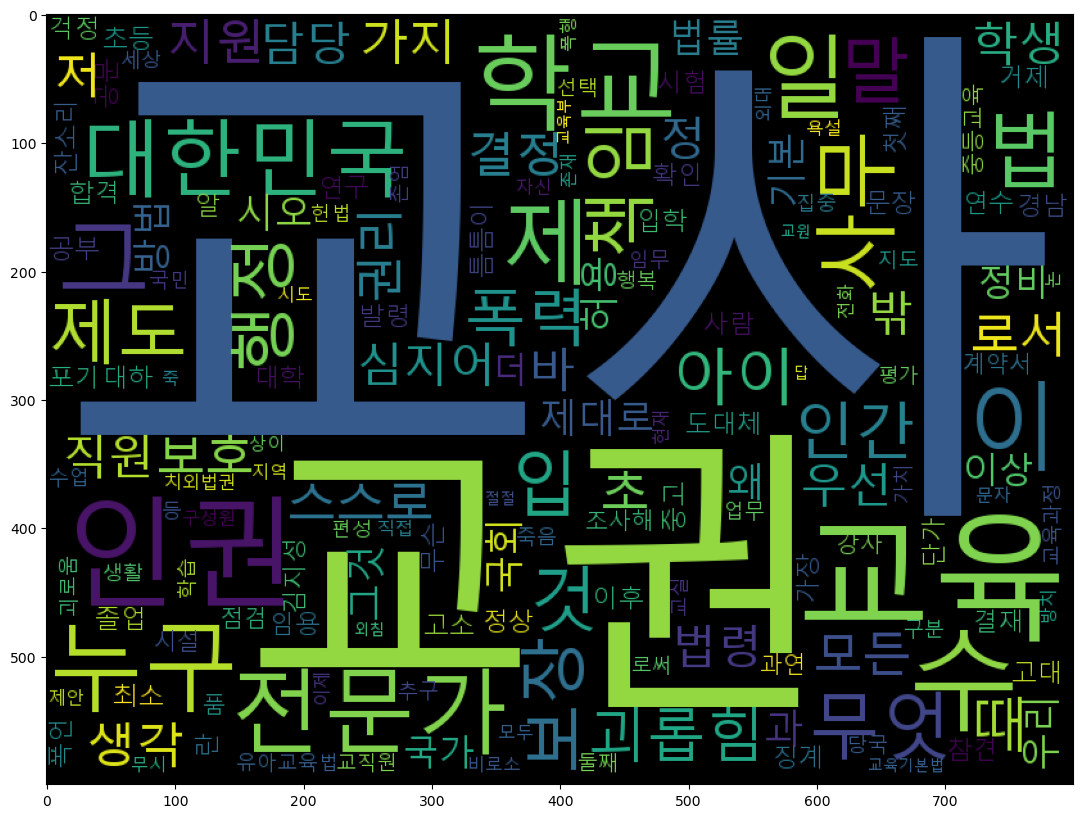

In [75]:
# 워드클라우드
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import Counter
from konlpy.tag import Okt

im = Image.open('imgs/cat.jpg')
mask_arr = np.array(im)

wc = WordCloud(font_path = 'malgun', width=400, height= 300, scale=2.0,
               max_font_size=250)
gen = wc.generate_from_frequencies(words)
plt.figure(figsize=(15, 10))

plt.imshow(gen)
# plt.axis('off')
plt.savefig('imgs/wordcloud01.jpg')

C:\Users\BIG603-09\AppData\Local\Temp\ipykernel_9712\2085101700.py:12: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


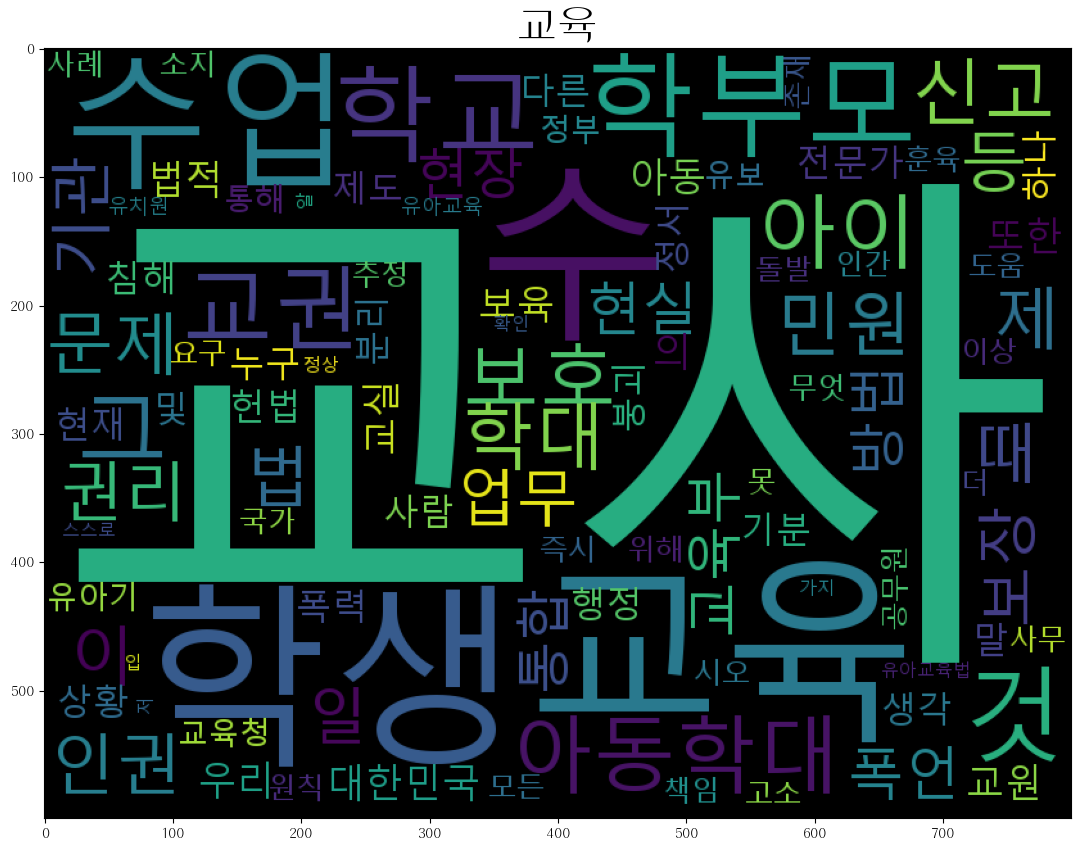

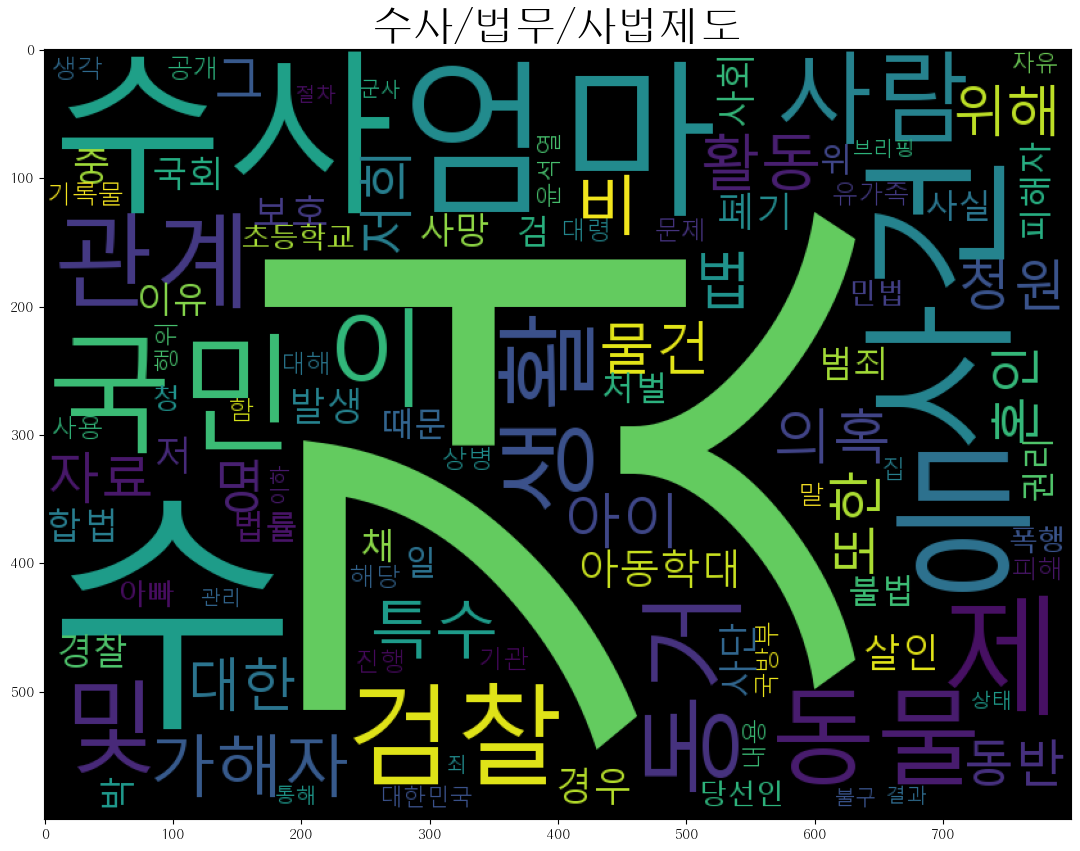

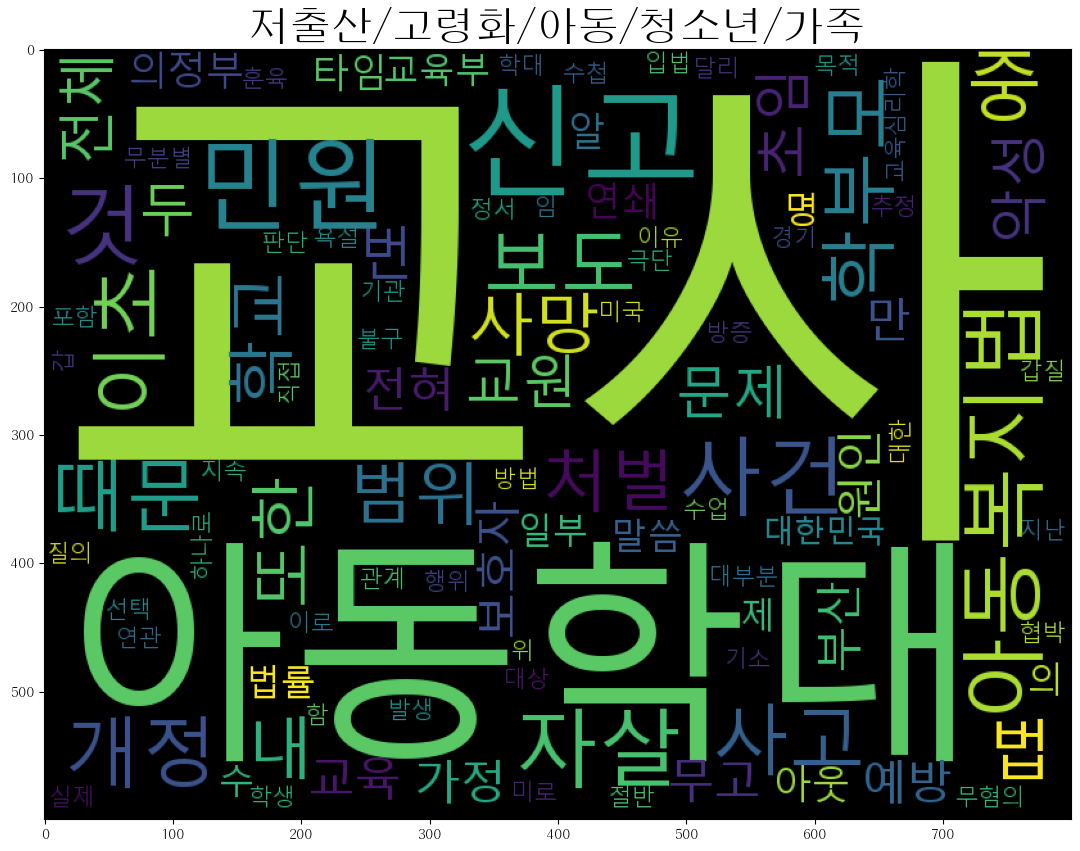

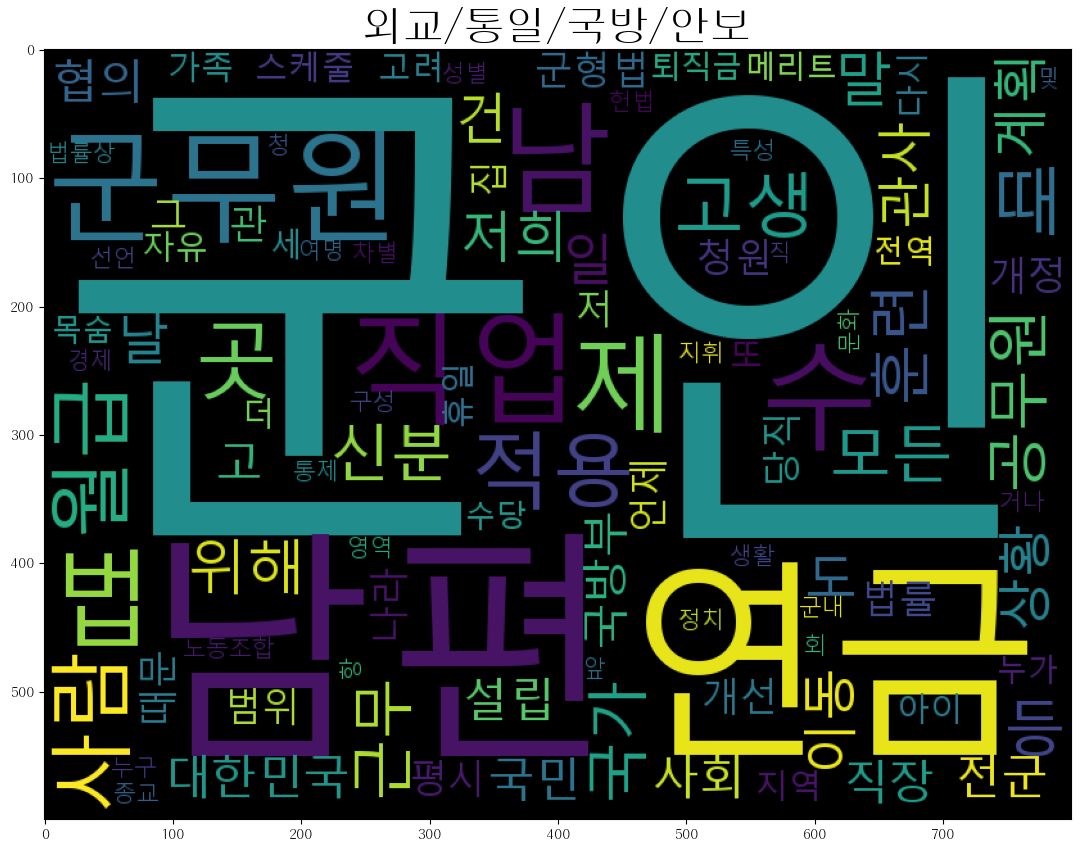

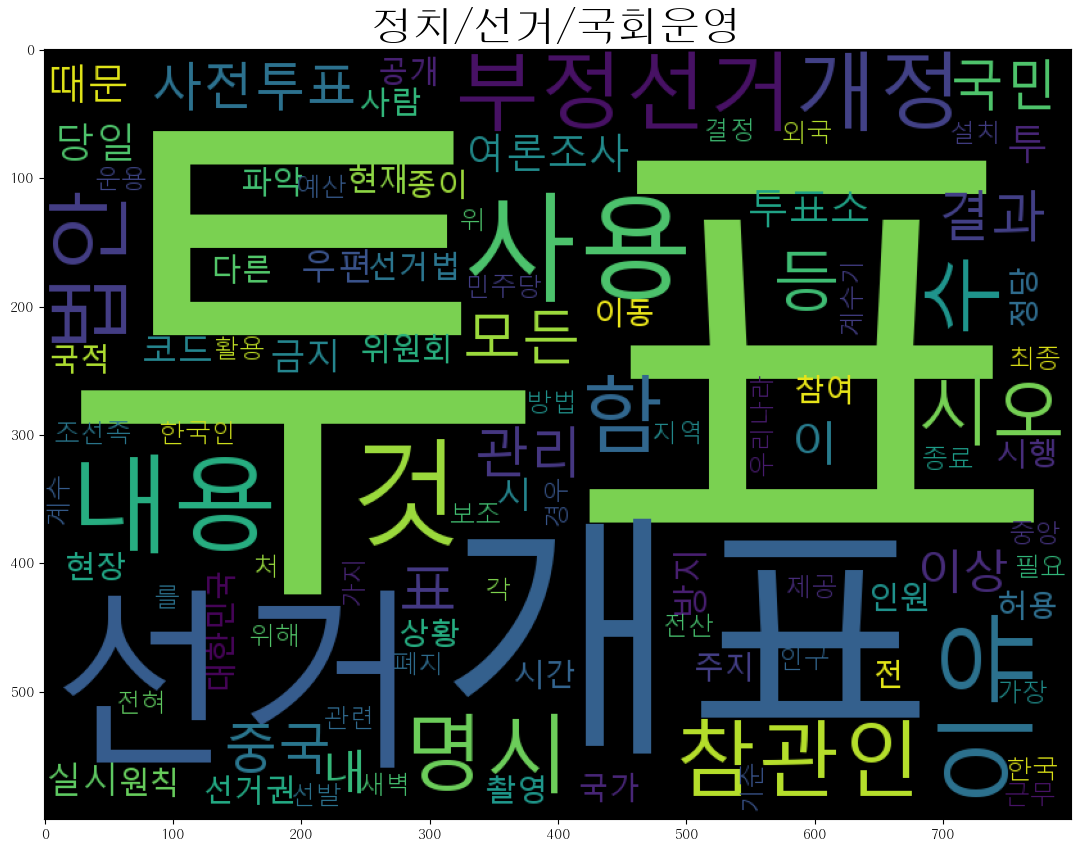

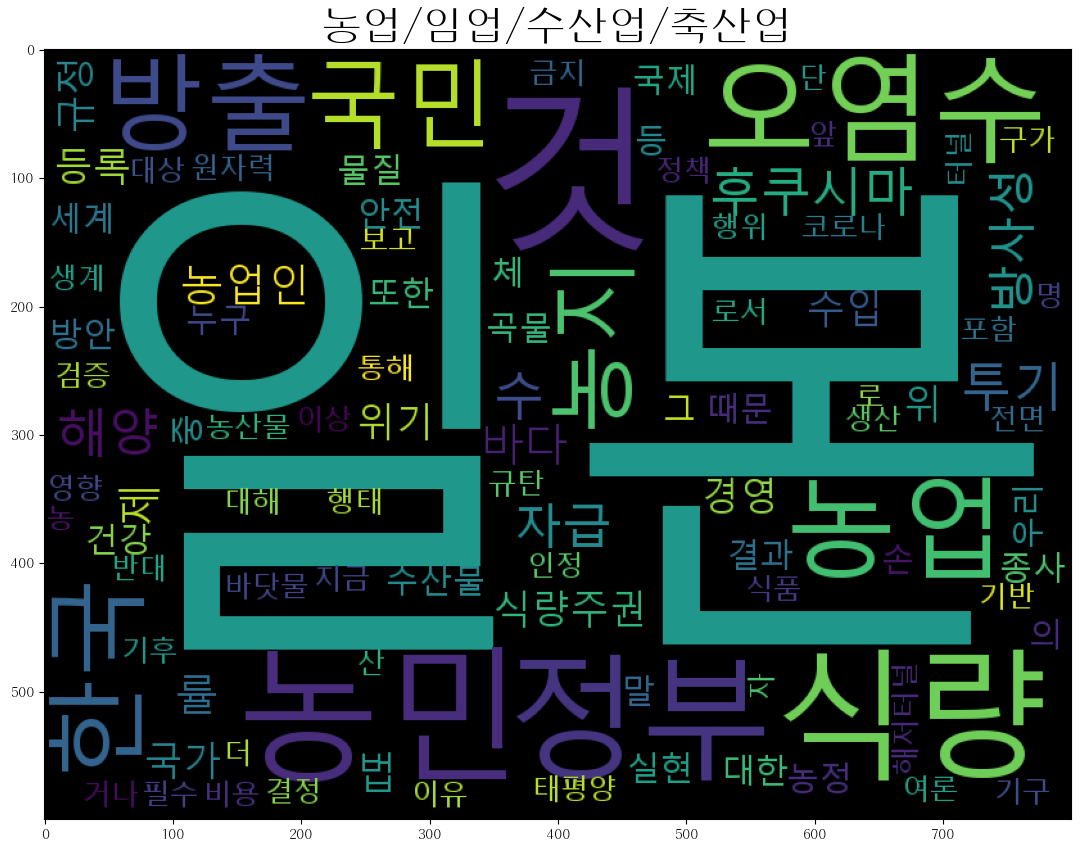

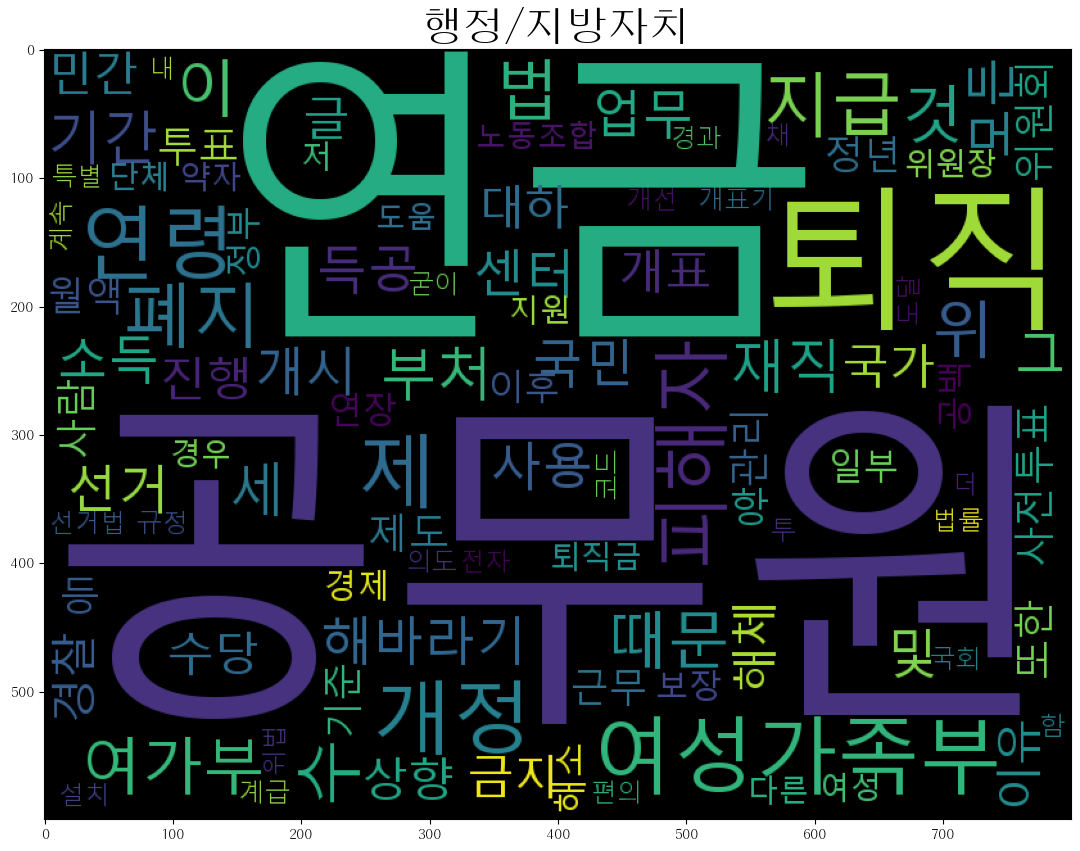

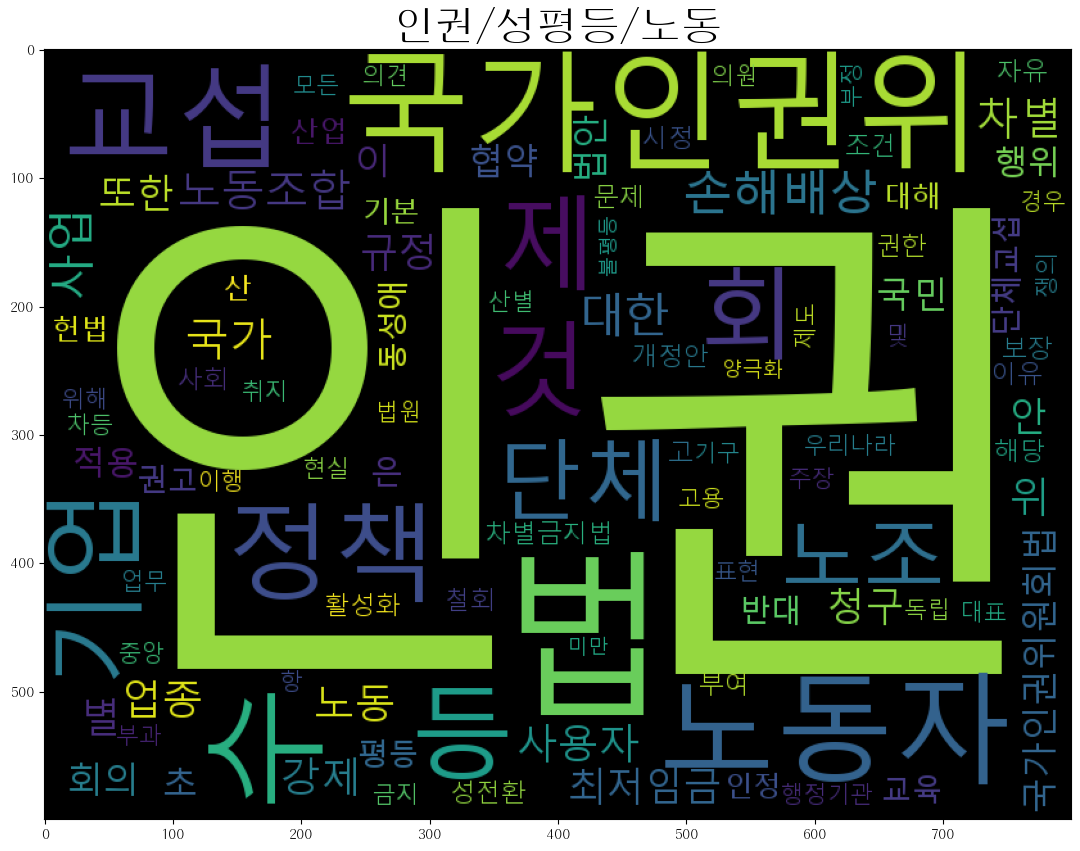

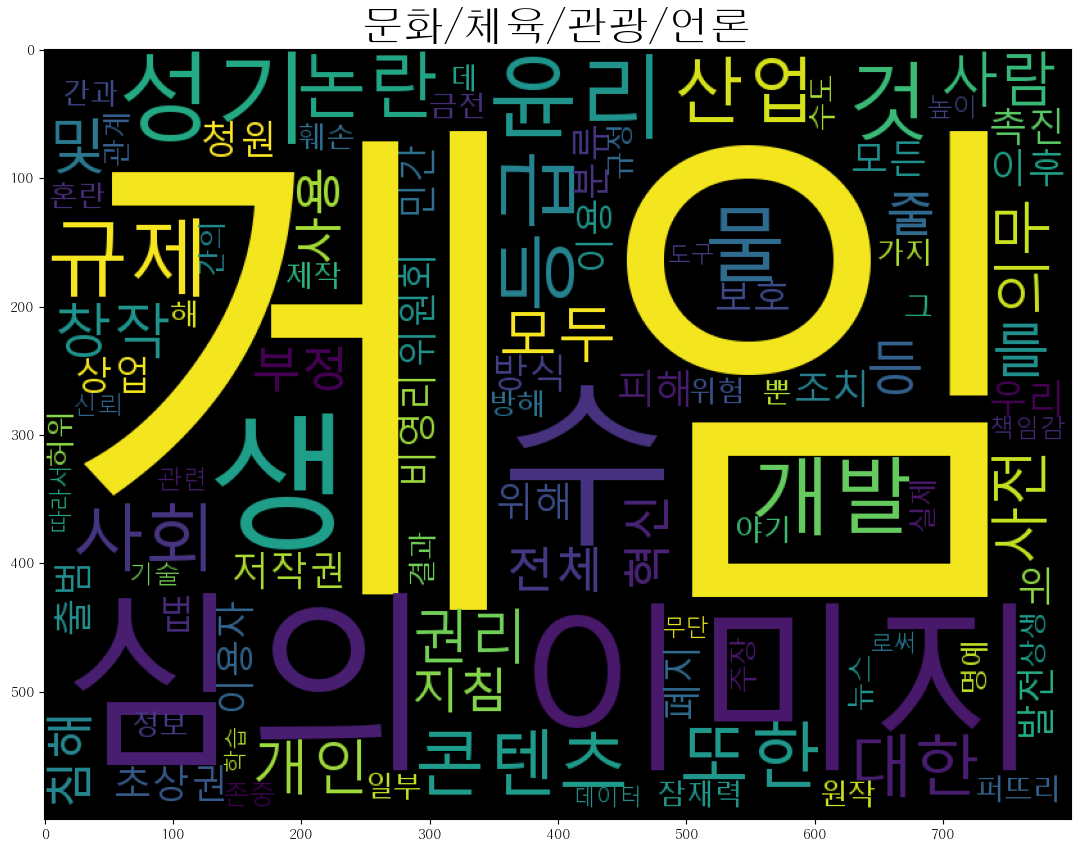

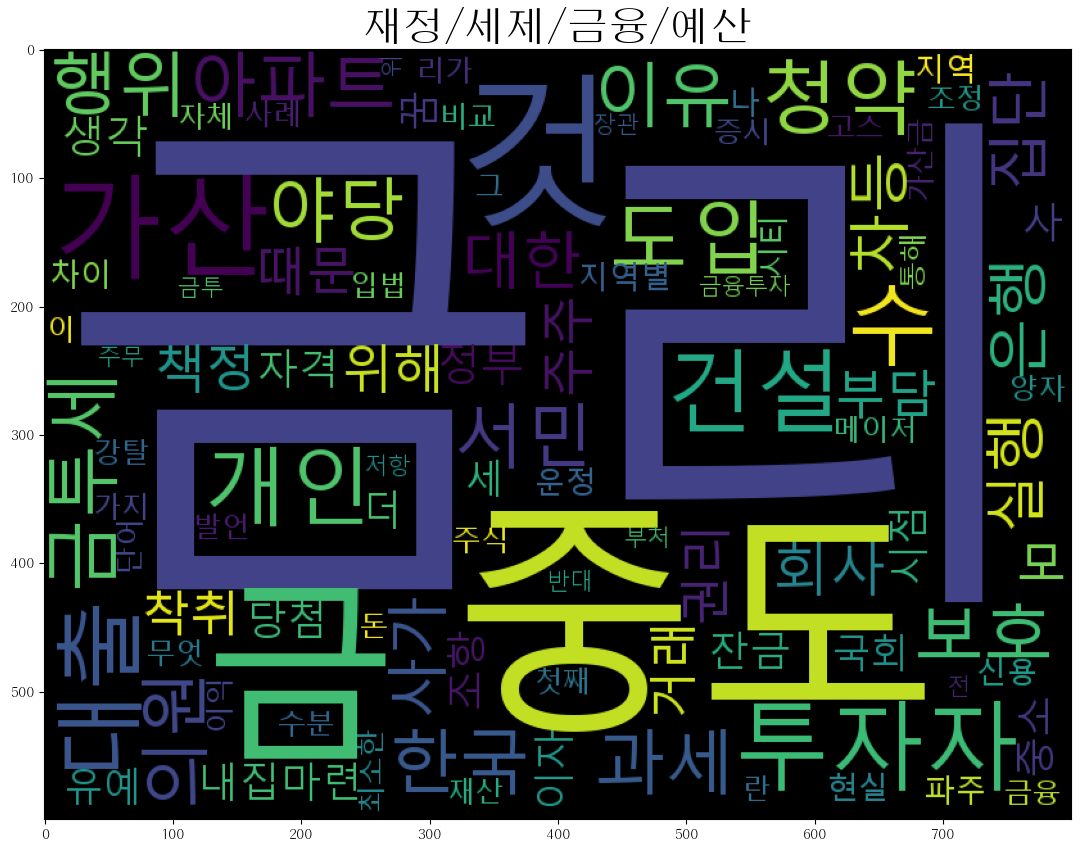

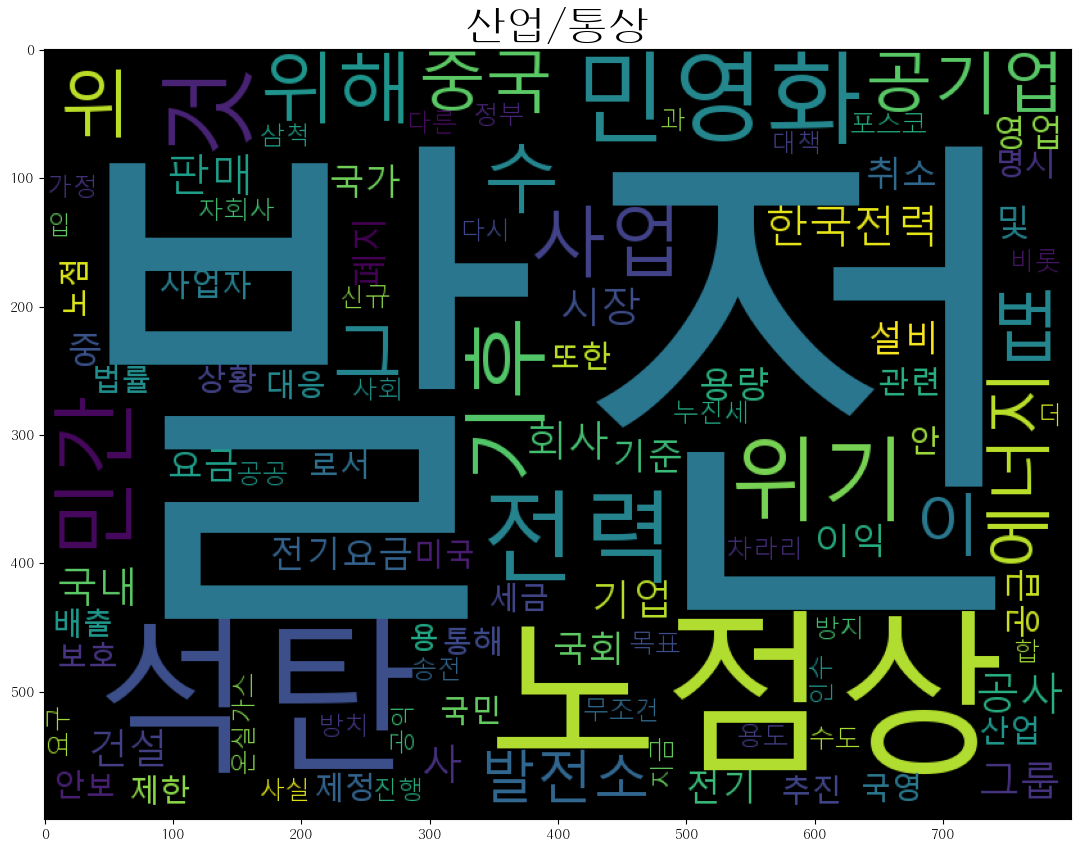

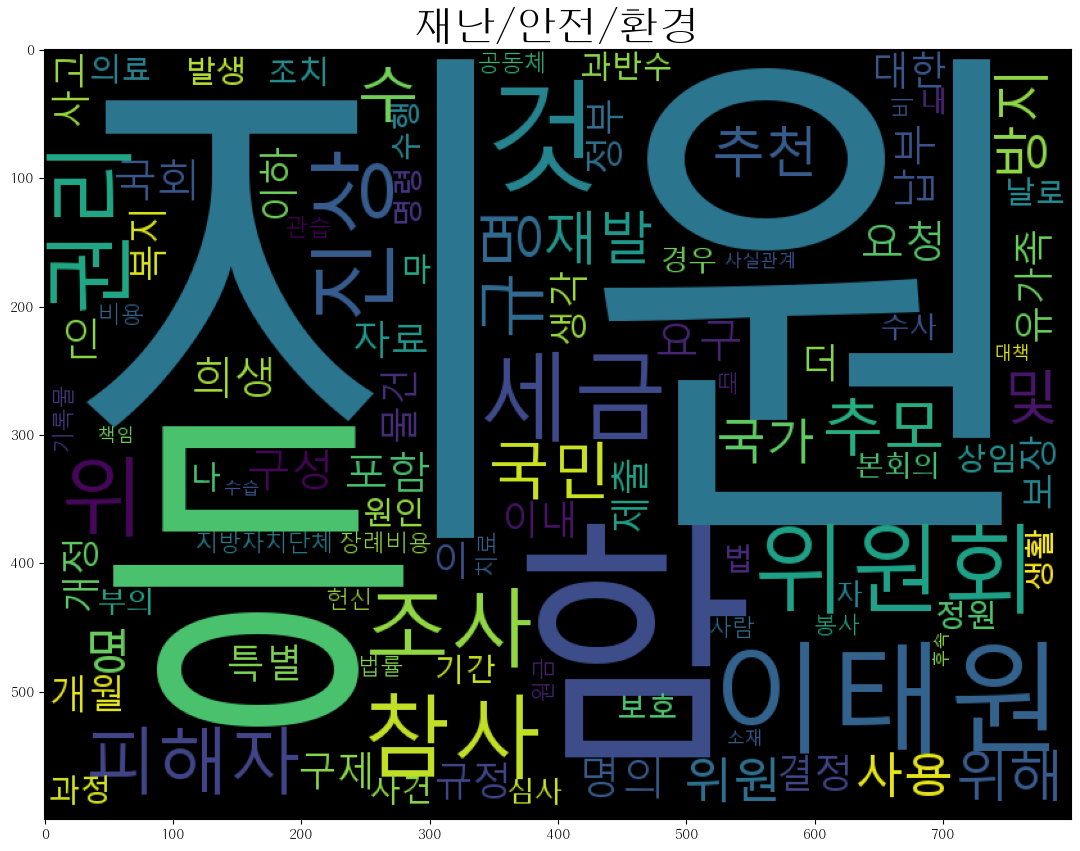

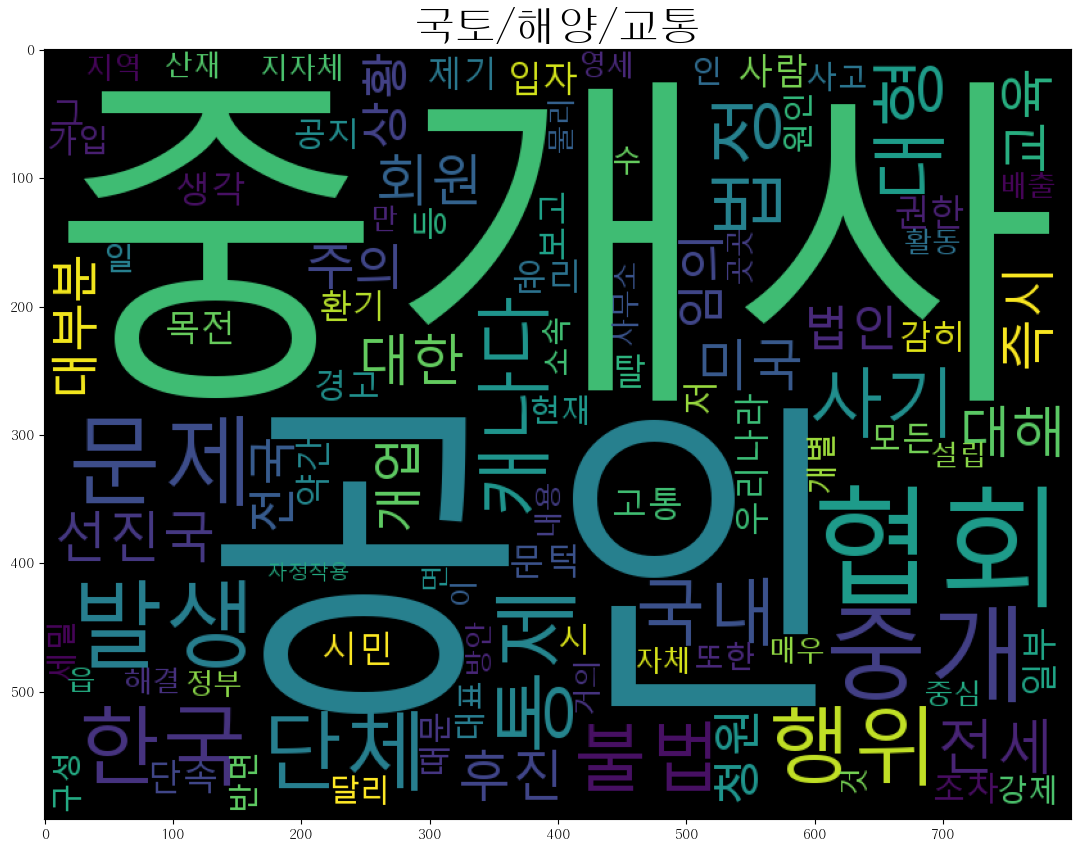

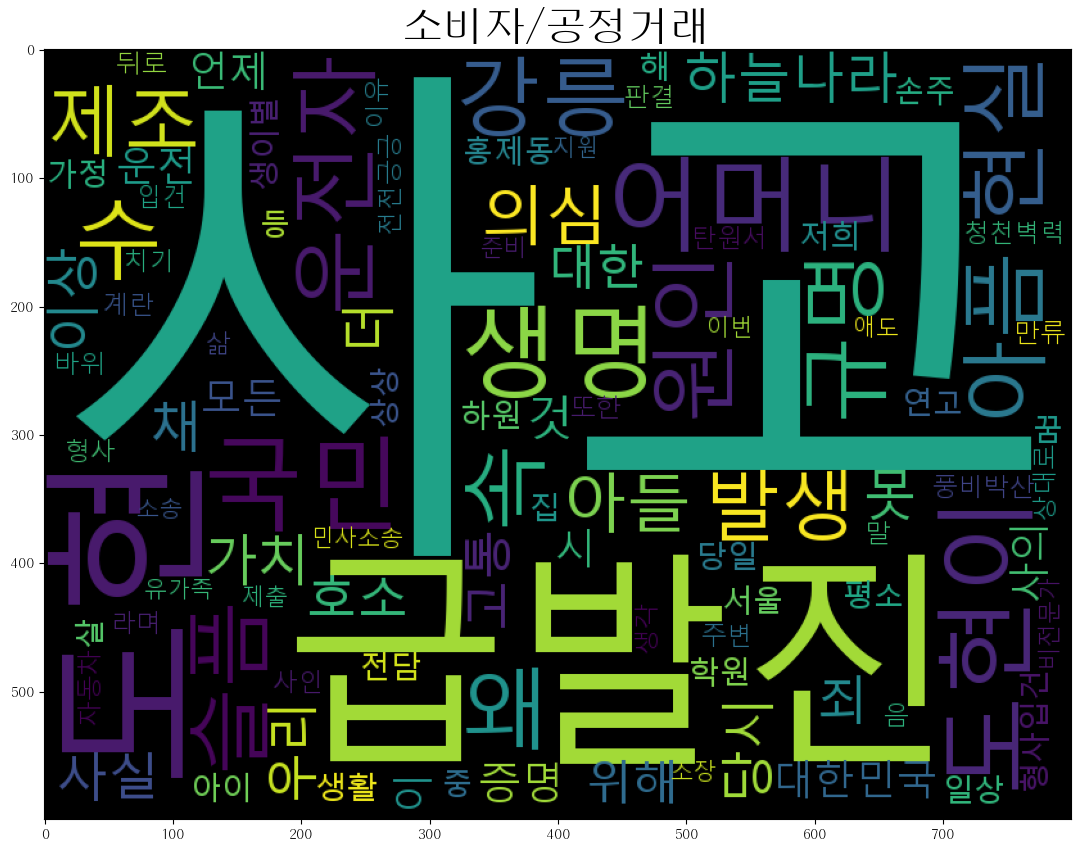

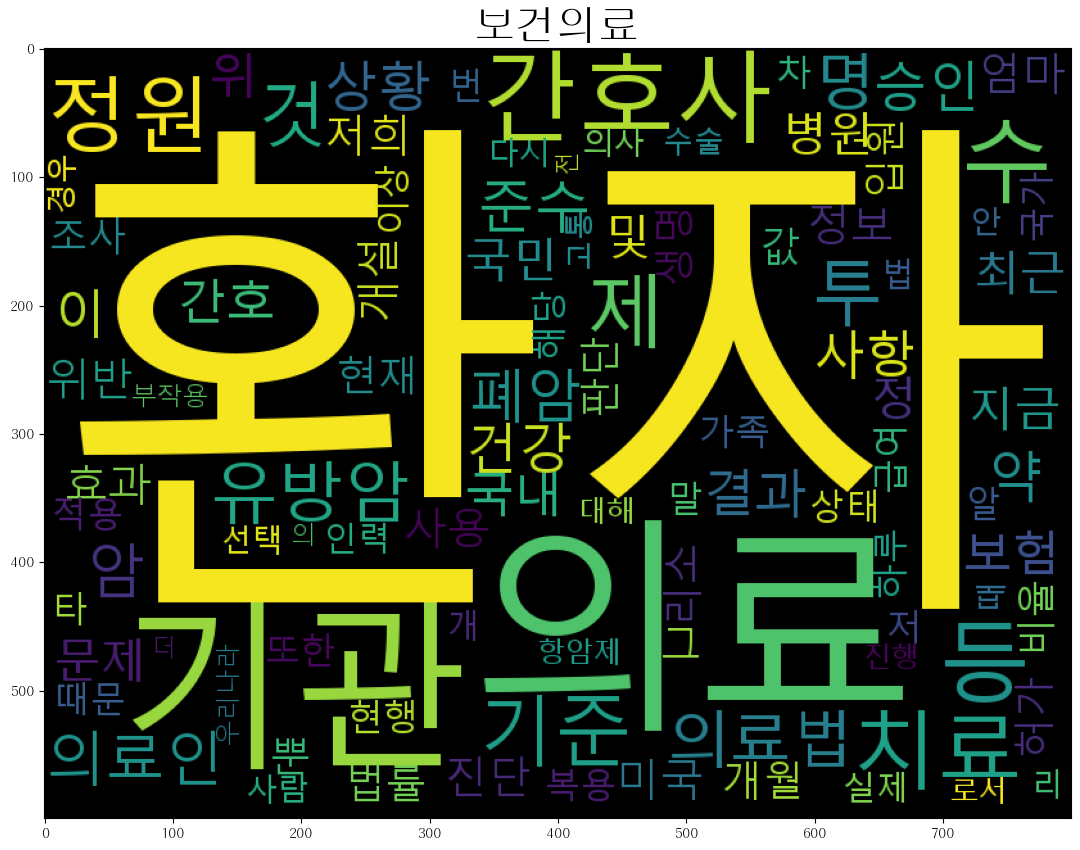

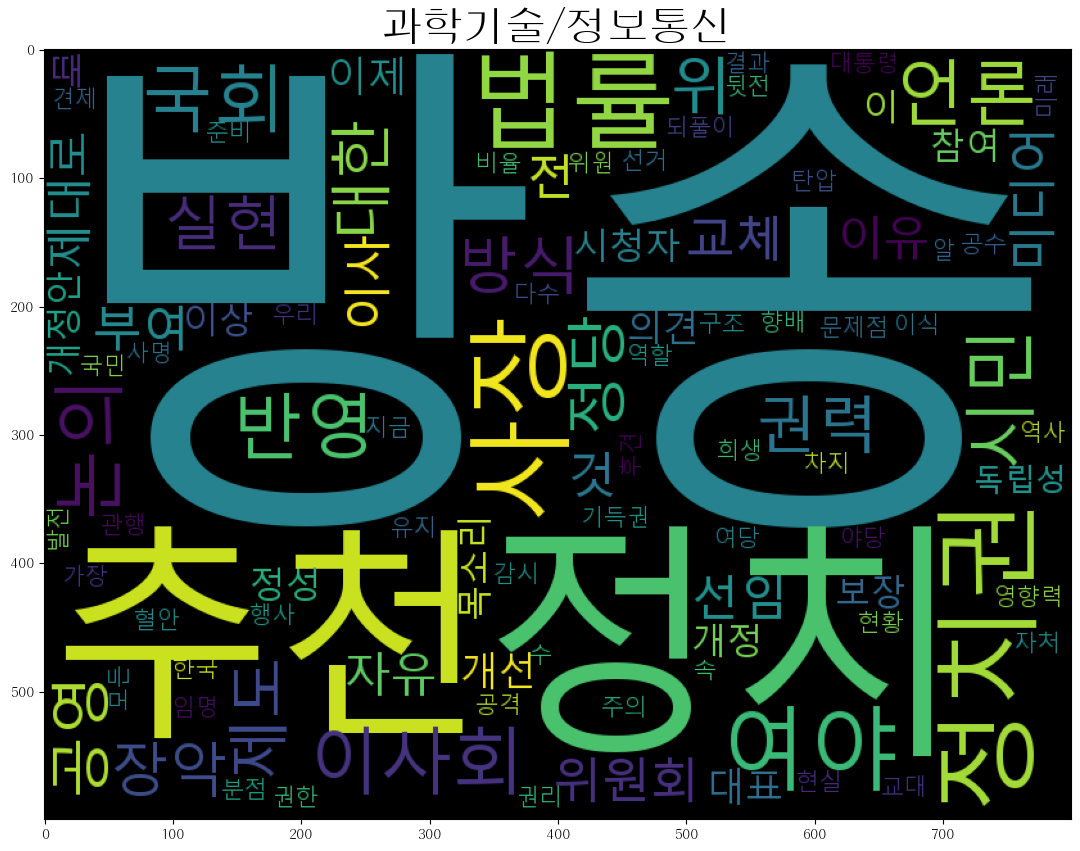

In [79]:
# category_conts

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import Counter
from konlpy.tag import Okt

import matplotlib
import matplotlib.font_manager as fm

font_location = 'C:/Windows/Fonts/H2GPRM.TTF' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)


okt = Okt()
wc = WordCloud(font_path = 'malgun', width=400, height= 300, scale=2.0,
               max_font_size=250)
for key, values in category_conts.items():
    conts = ''
    for row in values:
        conts += row[2]
    nouns = okt.nouns(conts)
    words = Counter(nouns)
    word_100 = dict(words.most_common(100))
    gen = wc.generate_from_frequencies(word_100)
    plt.figure(figsize=(15, 10))
    plt.title(key, fontsize=30)
    plt.imshow(gen)